# Module 1: Introduction to Scikit-Learn

## Section 2: Supervised Learning Algorithms

### Part 1: Linear Regression

In this part, we will explore Linear Regression, one of the fundamental supervised learning algorithms used for predicting continuous numeric values. Linear Regression models the relationship between independent variables (features) and a dependent variable (target) by fitting a linear equation to the data.

### 1.1 Understanding Linear Regression

Linear Regression assumes a linear relationship between the independent variables and the target variable. The equation of a simple linear regression model can be represented as:

$y = b_0 + b_1 * x_1 + b_2 * x_2 + b_n * x_n$


Where:

- $y$ is the target variable
- $x_1$, $x_2$, ..., xn are the independent variables (features)
- $b_0$ is the y intercept
- $b_1$, $b_2$, $b_n$ are the coefficients (slopes) of the linear equation

The goal of linear regression is to find the best-fit line that minimizes the difference between the predicted values and the actual values.

$\text{Least Squares Regression = Min(sum of squared residuals)}$ 

Linear Regression makes certain assumptions about the data. It assumes that:

- There is a linear relationship between the independent variables and the target variable.
- There is no multicollinearity among the independent variables.
- The residuals (the differences between the predicted and actual values) follow a normal distribution.
- The residuals have constant variance (homoscedasticity).

### 1.2 Training and Evaluation

To train a Linear Regression model, we need a labeled dataset with the target variable and the corresponding feature values. The model learns the coefficients (b0, b1, b2, ..., bn) by minimizing the residual sum of squares (RSS) or the mean squared error (MSE) between the predicted and actual values.

Once trained, we can evaluate the model's performance using evaluation metrics such as:

- Mean Squared Error (MSE) is a common metric used to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the actual values. The lower the MSE, the better a model fits a dataset. It penalizes larger errors more heavily, making it sensitive to outliers.<br>
    Note that MSE tells us that the average squared difference (deviation) value between the predicted values made by the model and the actual.

    $\text{MSE} = \frac{1}{n} * \sum(y_{actual} - y_{predicted})^2$
    
- Root Mean Squared Error (RMSE) is the square root of the MSE. It is a popular metric as it is in the same unit as the target variable, making it easier to interpret. The lower the RMSE, the better a model fits a dataset. Is also sensitive to outliers, just like MSE.<br>
    Note that RMSE is much more straightforward than the MSE because it talks about the average difference (deviation) value between the predicted values made by the model and the actual.

    $\text{RMSE} = \sqrt{MSE}$

- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE because it does not square the errors.

    $\text{MAE} = \frac{1}{n} * \sum|y_{actual} - y_{predicted}|$

- R-squared (coefficient of determination)is another evaluation metric for regression models that measures the proportion of the variance in the target variable that is predictable from the independent variables. R2 values range from 0 to 1, where 0 indicates that the model explains none of the variance, and 1 indicates a perfect fit.
R-squared, also known as the coefficient of determination, indicates the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features) through the model. Higher R-squared values indicate a better fit of the model to the data.

    $\text{R2} = 1 - (\sum(y_{actual} - y_{predicted})^2) / (\sum(y_{actual} - y_{mean})^2)$


### 1.3 Implementing Linear Regression in Scikit-Learn

#### Example 1: One independent variable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic data
np.random.seed(42)
# 100 x values between 0 and 10
X = np.linspace(0, 10, 100)  

# 100 y values following a normal distribution with 0 mean and 2 std desviation
y = 2 * X + 5 + np.random.normal(0, 2, 100)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# Create a linear regression model
regressor = LinearRegression()
# Fit the model on the training data
regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Plot the original data points and the linear regression line
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, y_pred, label='Predicted test data', color='red', marker='x')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), label='Linear regression line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Example')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the scatter plot of the training and test data points in blue and green, respectively. The red 'x' markers represent the predicted values for the test data based on the trained linear regression model. The red line represents the linear regression line fitted to the entire X range using the trained model. The goal of the linear regression model is to learn a line that best fits the training data and predicts the target variable for new data points.

In our evaluation metrics we found that:
- The MSE is 2.488168969160713, which means, on average, the squared difference between the predicted and actual values is around 2.49. Lower values of MSE are generally preferred, but an MSE of 2.49 is still relatively small, indicating that the model's predictions are reasonably close to the true values.<br>
- The RMSE is 1.5773930927833788, which means, on average, the difference between the predicted and actual values is around 1.57. Lower values of RMSE are generally preferred, but an MSE of 1.57 is still relatively small, indicating that the model's predictions are reasonably close to the true values.<br>
- The average absolute difference (MAE) between the predicted and true values is 1.2026. Since the MAE is measured in the same units as the target variable, this is the typical magnitude of the error in the model predictions.<br>
- An R2 score of 0.9325280805909615 indicates that approximately 93.25% of the variance in the target variable is explained by the independent variables through the model. This is quite high, suggesting that the model is doing an excellent job of capturing the relationships between the features and the target.<br>

Overall, this is a strong indication that the linear regression model is a good fit for the data and is making accurate predictions.
<br><br>

#### Example 2: Two independent variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic data with two independent variables
np.random.seed(42)
# 100 x1 values between 0 and 10
x1 = np.linspace(0, 10, 100)
# 100 x2 values between -5 and 5
x2 = np.linspace(-5, 5, 100)
# Combine the two independent variables into a 2D array as X
X = np.column_stack((x1, x2))

# Generate corresponding y values following a normal distribution with 0 mean and 2 std deviation
y = 2 * x1 + 3 * x2 + np.random.normal(0, 2, 100)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regressor = LinearRegression()
# Fit the model on the training data
regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Plot the actual Y values in 3D
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8,6))
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='green', marker='o', label='Actual values')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', marker='x', label='Predicted values')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Actual and Predicted Y values')
ax.view_init(elev=20, azim=-75)
ax.legend()
plt.show()

In this updated code, we generate two independent variables (x1, x2) and combine them into a 2D array X. The target variable y is generated using a linear combination of these two variables, with added noise. We then split the data into training and test sets.

Next, we create a linear regression model and fit it to the training data with multiple independent variables (X_train). We make predictions on the test data with multiple independent variables (X_test) and obtain corresponding predicted target values (y_pred).

The plot shows the actual and predicted values of the target variable (Y) in a 3D space, with two independent variables (X1 and X2). The green points represent the actual Y values for the test set while the red "x" markers represent the predicted Y values for the same test set.

In our evaluation metrics we found that:
- The MSE is  2.4881689691607116, which means, on average, the squared difference between the predicted and actual values is around 2.49. Lower values of MSE are generally preferred, but an MSE of 2.49 is still relatively small, indicating that the model's predictions are reasonably close to the true values.<br>
- The RMSE is 1.5773930927833784, which means, on average, the difference between the predicted and actual values is around 1.58. Lower values of RMSE are generally preferred, but an MSE of 1.58 is still relatively small, indicating that the model's predictions are reasonably close to the true values.<br>
- The average absolute difference (MAE) between the predicted and true values is 1.2026. Since the MAE is measured in the same units as the target variable, this is the typical magnitude of the error in the model predictions.<br>
- An R2 score of 0.9882143330718749 indicates that approximately 98.82% of the variance in the target variable is explained by the independent variables through the model. This is quite high, suggesting that the model is doing an excellent job of capturing the relationships between the features and the target.<br>

Overall, this is a strong indication that the linear regression model is a good fit for the data and is making accurate predictions.


#### Example 3: Multiple independent variables

Mean Squared Error (MSE): 0.27140755411336454
Root Mean Squared Error (RMSE): 0.5209679012313182
R-squared (R2) Score: 0.8314259705793847


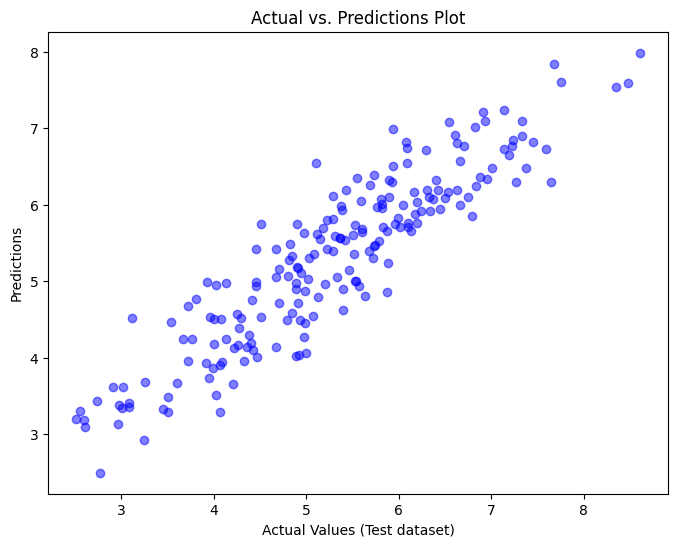

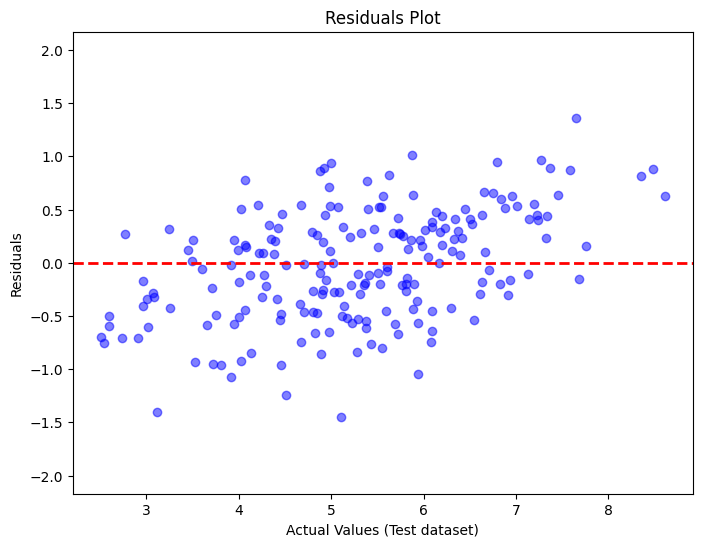

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
num_samples = 1000
num_features = 3
X = np.random.rand(num_samples, num_features)  # Independent variables
true_coeffs = np.array([2.0, -3.0, 1.5])  # True coefficients
true_intercept = 5.0  # True intercept
y = np.dot(X, true_coeffs) + true_intercept + np.random.randn(num_samples) * 0.5  # Adding noise
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regressor = LinearRegression()
# Fit the model on the training data
regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Plot the residuals (differences between y_actual and y_predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title("Actual vs. Predictions Plot")
plt.xlabel("Actual Values (Test dataset)")
plt.ylabel("Predictions")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals Plot")
plt.xlabel("Actual Values (Test dataset)")
plt.ylabel("Residuals")
plt.ylim(-max(abs(residuals)) * 1.5, max(abs(residuals)) * 1.5)  # Set y-axis limits
plt.show()

In this example, we generate synthetic data with three independent variables and a true linear relationship between the variables and the target variable. The data is split into training and test sets using train_test_split from scikit-learn. The linear regression model is trained on the training data using fit method.

Our actual values vs. predicted values plot we can see how well the model predictions align with the actual values. Ideally, the points should lie close to the diagonal line (y = x), indicating a good fit of the model. Deviations from the diagonal line suggest discrepancies between the predicted and actual values. Seeing the plot our model is pretty well fitted to the data.

In this example we cannot make a 2D or 3D plot because we have now multiple independent variables. Instead, we can plot the residuals.

One thing to note right off the bat is that the residuals always sum to 0 in simple linear regression.
These observed residuals are going to sum to 0, and that's why we shoud put this 0 line in for a little perspective.
The general idea is to see points randomly scattered above and below the predicted values line. We expect to don't see any trend there. A constant variability.

Our residuals plot show an upward trend. This indicates that the model’s predictions aren’t very good at all. The linear model may not be the best.

In our evaluation metrics we found that:
- The MSE is 0.27140755411336454, which means, on average, the squared difference between the predicted and actual values is around 0.27.<br>
- The RMSE is 0.5209679012313182, which means, on average, the difference between the predicted and actual values is around 0.52.<br>
- The average absolute difference (MAE) between the predicted and true values is 0.533.<br>
- An R2 score of 0.8314259705793847 indicates that approximately 83% of the variance in the target variable is explained by the independent variables through the model. This is suggesting that the model is capturing the relationships between the features and the target.<br>


### 1.4 Summary

Linear Regression is a widely used supervised learning algorithm for modeling the relationship between a dependent variable (target) and one or more independent variables (features). It assumes a linear relationship between the features and the target, and aims to find the best-fit line that minimizes the difference between the predicted and actual values.

To evaluate a Linear regression model:
- Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values.
- Root Mean Squared Error (RMSE) is the square root of the MSE. It is a popular metric as it is in the same unit as the target variable, making it easier to interpret.
- Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE.
- R-squared (R2), also known as the coefficient of determination, measures the proportion of the variance in the target variable that is predictable from the independent variables. R2 values range from 0 to 1, where 0 indicates that the model explains none of the variance, and 1 indicates a perfect fit.

In summary MSE and RMSE penalize larger errors more severely, while MAE is more robust to outliers. R2 provides a measure of how well the model fits the data and can range from 0 to 1.

For evaluate the performance of the regression model we can also see the actual vs. predicted plot and the predicted vs. residuals plot.

- Actual vs. Predicted Plot:<br>
    The actual vs. predicted plot is a scatter plot where the actual target values are plotted on the y-axis, and the corresponding predicted values are plotted on the x-axis. Each data point represents a specific sample in the test dataset. The plot helps to visualize how well the model predictions align with the actual values. Ideally, the points should lie close to the diagonal line (y = x), indicating a good fit of the model. Deviations from the diagonal line suggest discrepancies between the predicted and actual values.

- Actual vs. Residuals Plot:<br>
    The actual vs. residuals plot is also a scatter plot, where the actual target values are plotted on the x-axis, and the residuals (differences between actual and predicted values) are plotted on the y-axis. In an effective model, the residuals should be randomly scattered around the horizontal line at y = 0, indicating that the model has captured the underlying patterns in the data. Patterns or trends in the residuals indicate that the model is not performing optimally.